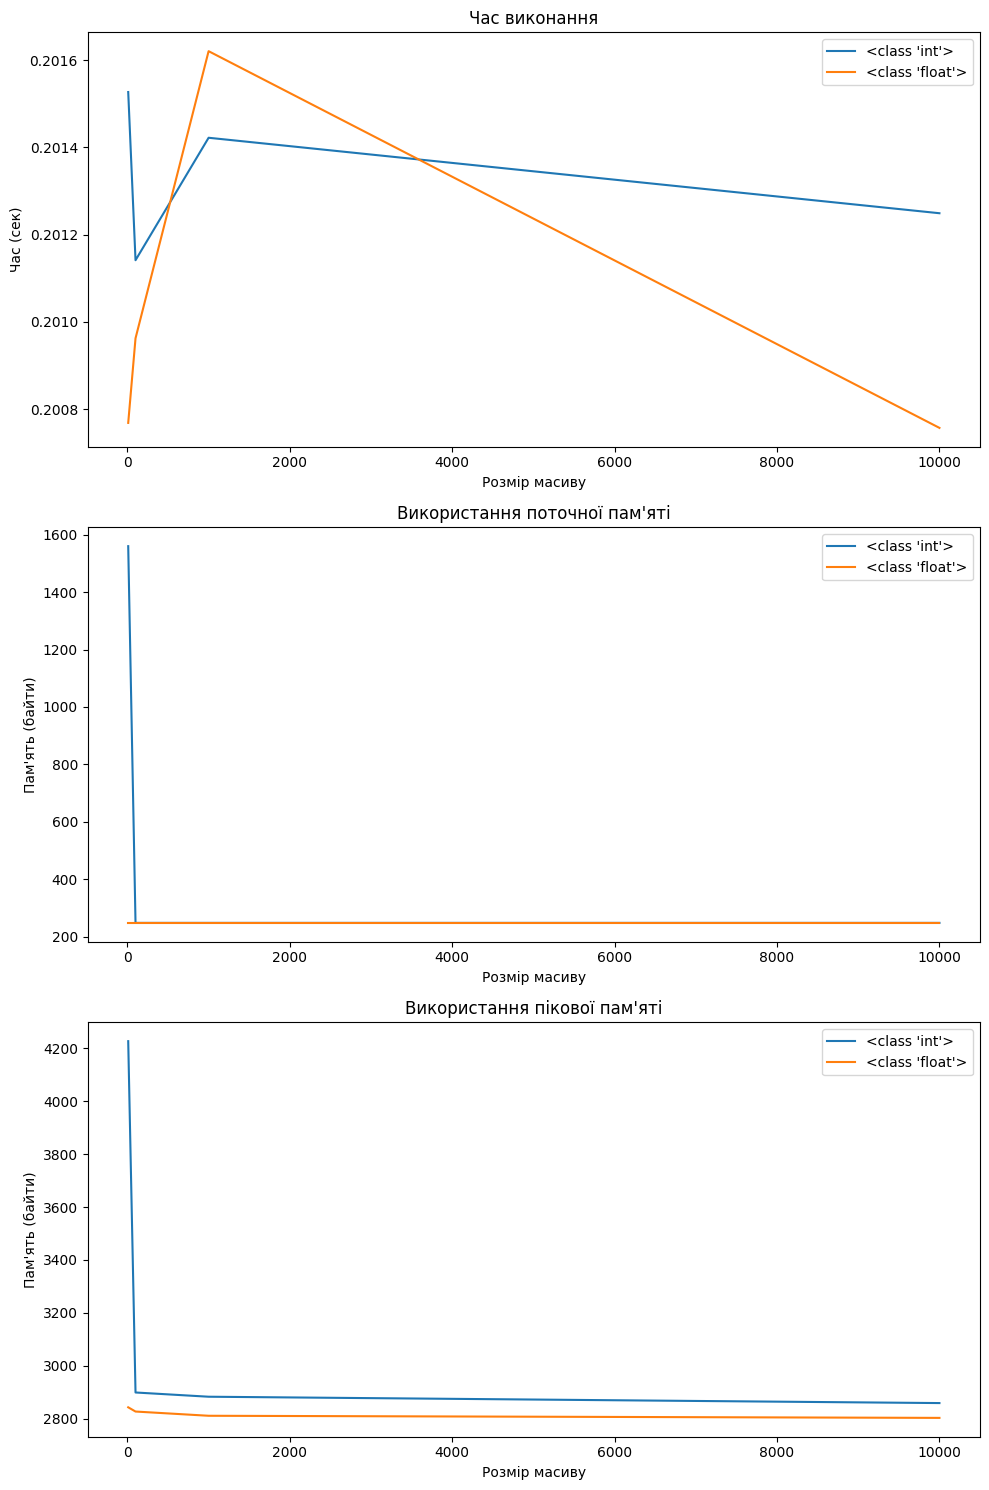

In [2]:
import numpy as np
import time
import tracemalloc
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Функція для обернення масиву
def reverse_array(arr):
    return arr[::-1]

# Функція для вимірювання часу виконання та використання пам'яті
def measure_performance(func, arr):
    start_time = time.time()
    tracemalloc.start()
    mem_usage_start = memory_usage()[0]
    
    result = func(arr)
    
    mem_usage_end = memory_usage()[0]
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    end_time = time.time()
    
    exec_time = end_time - start_time
    mem_usage = mem_usage_end - mem_usage_start
    
    return exec_time, current, peak, mem_usage

# Розміри масивів та типи даних
sizes = [10, 100, 1000, 10000]
types = [int, float]

# Для зберігання результатів
results = {'size': [], 'type': [], 'exec_time': [], 'current_memory': [], 'peak_memory': [], 'memory_usage': []}

# Проведення вимірювань
for dtype in types:
    for size in sizes:
        # Створення масиву
        array = np.arange(size, dtype=dtype)
        
        # Вимірювання продуктивності
        exec_time, current, peak, mem_usage = measure_performance(reverse_array, array)
        
        # Збереження результатів
        results['size'].append(size)
        results['type'].append(str(dtype))
        results['exec_time'].append(exec_time)
        results['current_memory'].append(current)
        results['peak_memory'].append(peak)
        results['memory_usage'].append(mem_usage)

# Побудова графіків
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Графік часу виконання
for dtype in types:
    dtype_results = [results['exec_time'][i] for i in range(len(results['size'])) if results['type'][i] == str(dtype)]
    axes[0].plot(sizes, dtype_results, label=str(dtype))
axes[0].set_title('Час виконання')
axes[0].set_xlabel('Розмір масиву')
axes[0].set_ylabel('Час (сек)')
axes[0].legend()

# Графік використання пам'яті (поточна пам'ять)
for dtype in types:
    dtype_results = [results['current_memory'][i] for i in range(len(results['size'])) if results['type'][i] == str(dtype)]
    axes[1].plot(sizes, dtype_results, label=str(dtype))
axes[1].set_title('Використання поточної пам\'яті')
axes[1].set_xlabel('Розмір масиву')
axes[1].set_ylabel('Пам\'ять (байти)')
axes[1].legend()

# Графік використання пам'яті (пікова пам'ять)
for dtype in types:
    dtype_results = [results['peak_memory'][i] for i in range(len(results['size'])) if results['type'][i] == str(dtype)]
    axes[2].plot(sizes, dtype_results, label=str(dtype))
axes[2].set_title('Використання пікової пам\'яті')
axes[2].set_xlabel('Розмір масиву')
axes[2].set_ylabel('Пам\'ять (байти)')
axes[2].legend()

plt.tight_layout()
plt.show()
